In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # makes the notebook fill the whole window

import os
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

# Load in the data

In [2]:
df = pd.read_csv('./pokemon.csv',encoding='cp1252',low_memory=False)

### Feature One: Legendary Pokemon 

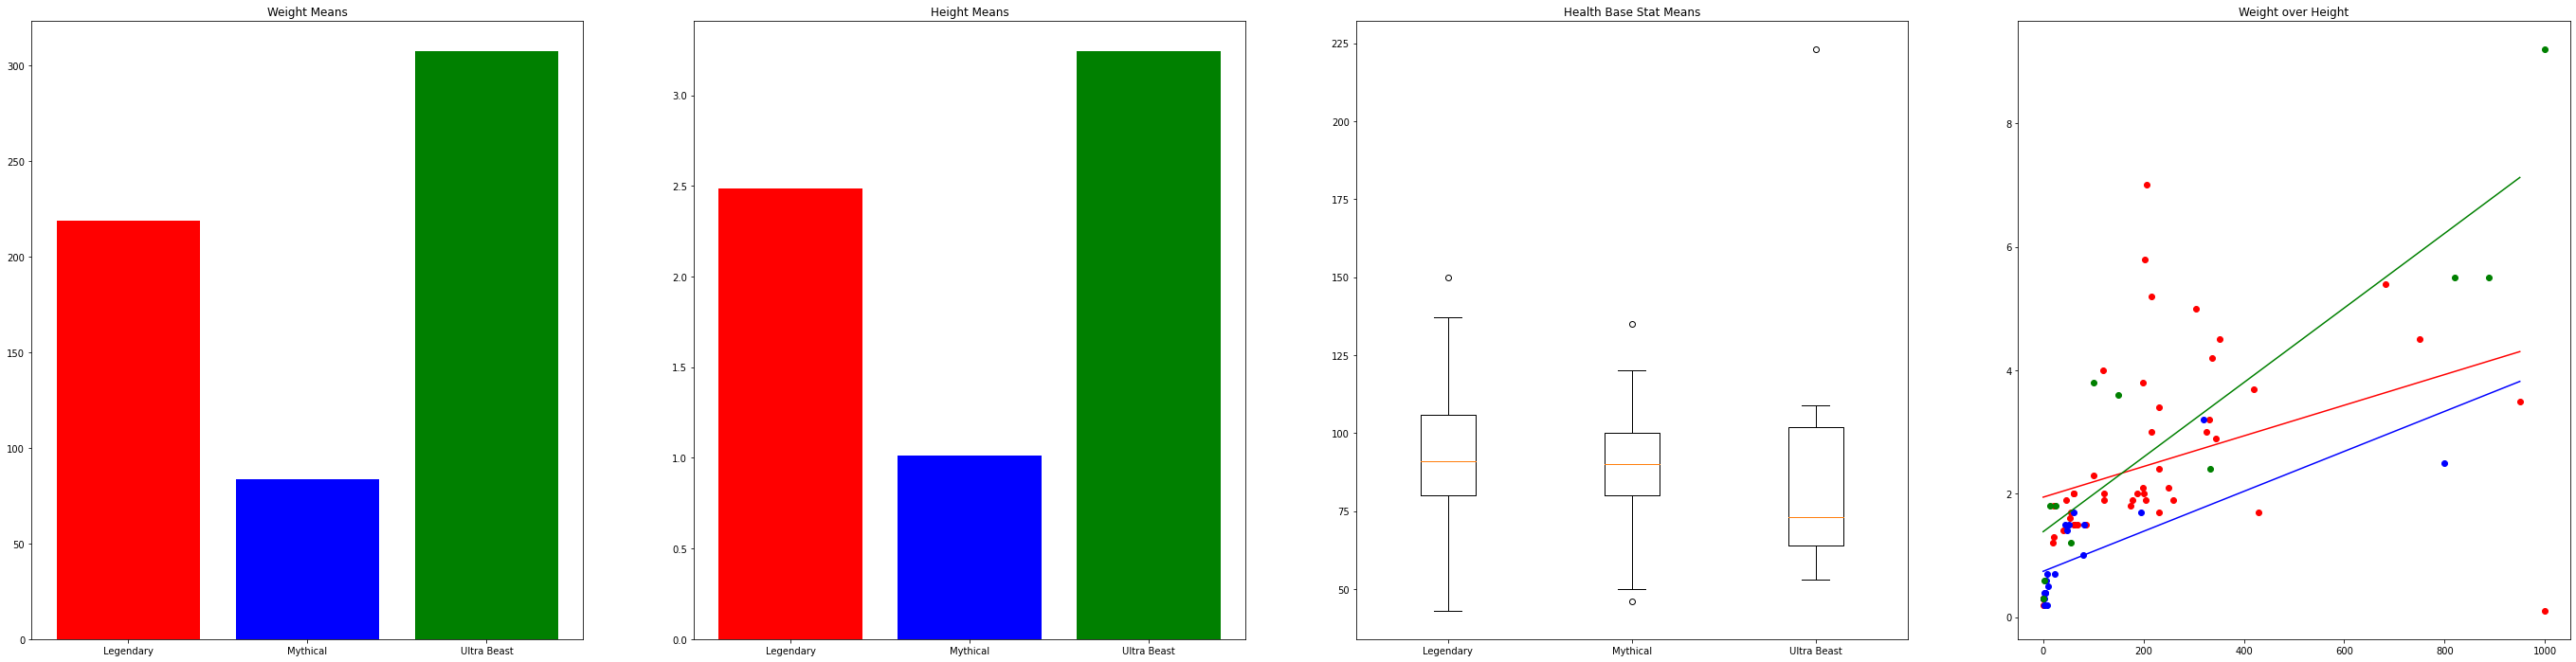

count            81
unique            3
top       Legendary
freq             49
Name: Legendary Type, dtype: object


In [3]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(48,12))

# Bar graph for mean weight of each category
x = df.groupby(by='Legendary Type',as_index=False)['Weight'].mean()['Legendary Type'] #The bars to graph
y = df.groupby(by='Legendary Type',as_index=False)['Weight'].mean()['Weight'] #How tall each bar needs to be
ax0.set_title('Weight Means')
ax0.bar(x,y,color=['red','blue','green'])

# Bar graph for mean height of each category
x = df.groupby(by='Legendary Type',as_index=False)['Height'].mean()['Legendary Type'] #The bars to graph
y = df.groupby(by='Legendary Type',as_index=False)['Height'].mean()['Height'] #How tall each bar needs to be
ax1.set_title('Height Means')
ax1.bar(x,y,color=['red','blue','green'])

# Box plot of Health Base State per category
labels = ['Legendary','Mythical','Ultra Beast']
x1 = df[df['Legendary Type'] == 'Legendary']['Health Base Stat']
x2 = df[df['Legendary Type'] == 'Mythical']['Health Base Stat']
x3 = df[df['Legendary Type'] == 'Ultra Beast']['Health Base Stat']
ax2.set_title('Health Base Stat Means')
ax2.boxplot([x1,x2,x3],labels=labels)

#This last graph was done since the weight and height followed roughly the same patter, wanted to see if the line of best fit also followed a similar trend. It was close.
m,b = np.polyfit(df[df['Legendary Type'] == 'Legendary']['Weight'],df[df['Legendary Type'] == 'Legendary']['Height'],1)
ax3.plot(np.arange(0,1000,50), m*np.arange(0,1000,50) + b,color='red')
m,b = np.polyfit(df[df['Legendary Type'] == 'Mythical']['Weight'],df[df['Legendary Type'] == 'Mythical']['Height'],1)
ax3.plot(np.arange(0,1000,50), m*np.arange(0,1000,50) + b,color='blue')
m,b = np.polyfit(df[df['Legendary Type'] == 'Ultra Beast']['Weight'],df[df['Legendary Type'] == 'Ultra Beast']['Height'],1)
ax3.plot(np.arange(0,1000,50), m*np.arange(0,1000,50) + b,color='green')

ax3.scatter(df[df['Legendary Type'] == 'Legendary']['Weight'],df[df['Legendary Type'] == 'Legendary']['Height'],color='red')
ax3.scatter(df[df['Legendary Type'] == 'Mythical']['Weight'],df[df['Legendary Type'] == 'Mythical']['Height'],color='blue')
ax3.scatter(df[df['Legendary Type'] == 'Ultra Beast']['Weight'],df[df['Legendary Type'] == 'Ultra Beast']['Height'],color='green')
ax3.set_title('Weight over Height')

plt.show()
print(df['Legendary Type'].describe())

    - The final plot was because the first 2 looked like there might be a very clear linear relationship between them. After graphing the points, it doesn't seem that way too much.
    - The description of the Legendary feature is quite interesting. The count is really low (only 81/~900)

## Feature Two/Three: Primary Type and Secondary Type

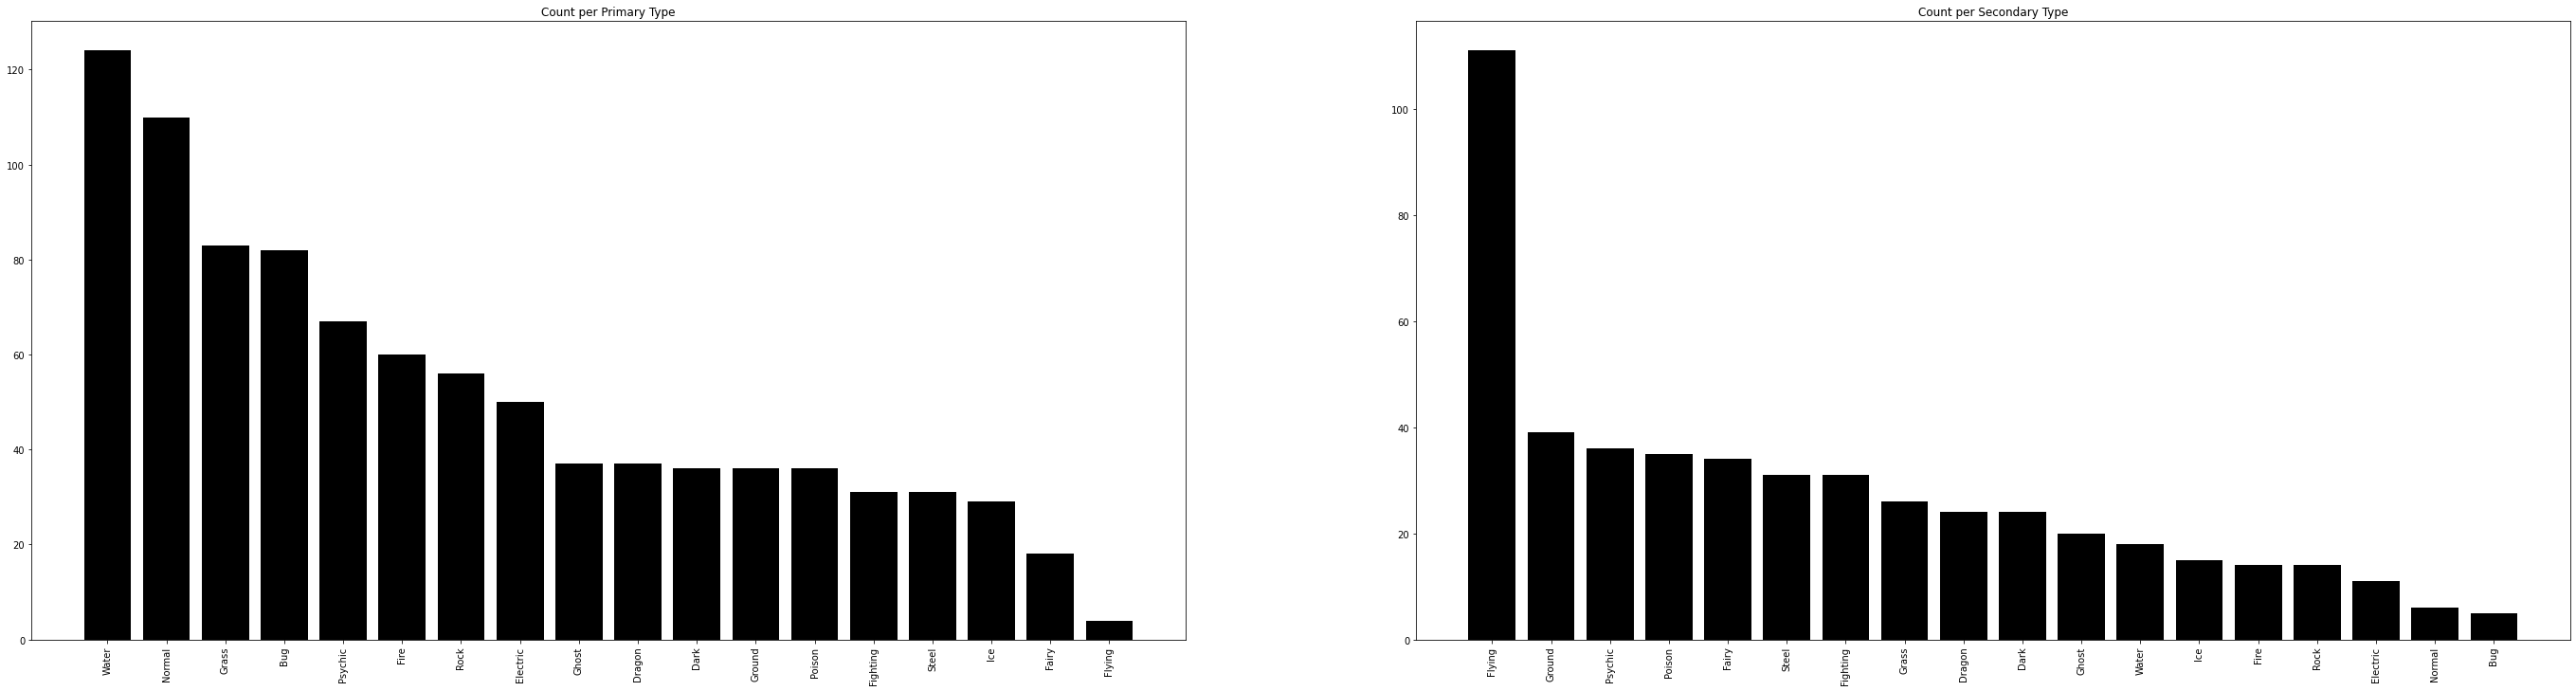

count       927
unique       18
top       Water
freq        124
Name: Primary Type, dtype: object
count        494
unique        18
top       Flying
freq         111
Name: Secondary Type, dtype: object


In [4]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(48,12))

# Bar graph for count of pokemon per primary type
x = df.groupby(by='Primary Type',as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Primary Type'] #The bars to graph
y = df.groupby(by='Primary Type',as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Pokedex Number'] #How tall each bar needs to be
ax0.set_title('Count per Primary Type')
plt.sca(ax0)
plt.xticks(rotation=90)
ax0.bar(x,y,color='black')

# Bar graph for count of pokemon per secondary type
x = df.groupby(by='Secondary Type',as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Secondary Type'] #The bars to graph
y = df.groupby(by='Secondary Type',as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Pokedex Number'] #How tall each bar needs to be
ax1.set_title('Count per Secondary Type')
plt.sca(ax1)
plt.xticks(rotation=90)
ax1.bar(x,y,color='black')

plt.show()
print(df['Primary Type'].describe())
print(df['Secondary Type'].describe())

    - The count of this was unexpected. When playing pokemon games, I assumed that normal type was going to be the most common type, but it ended up being water type
    - Flying also had the lowest in primary type, but the highest in secondary type
    - Normal was either the second highest or second lowest
    - Every Pokemon has a primary type, but not a secondary type (the count is different)

## Feature Four/Five: Primary and Secondary Egg Group

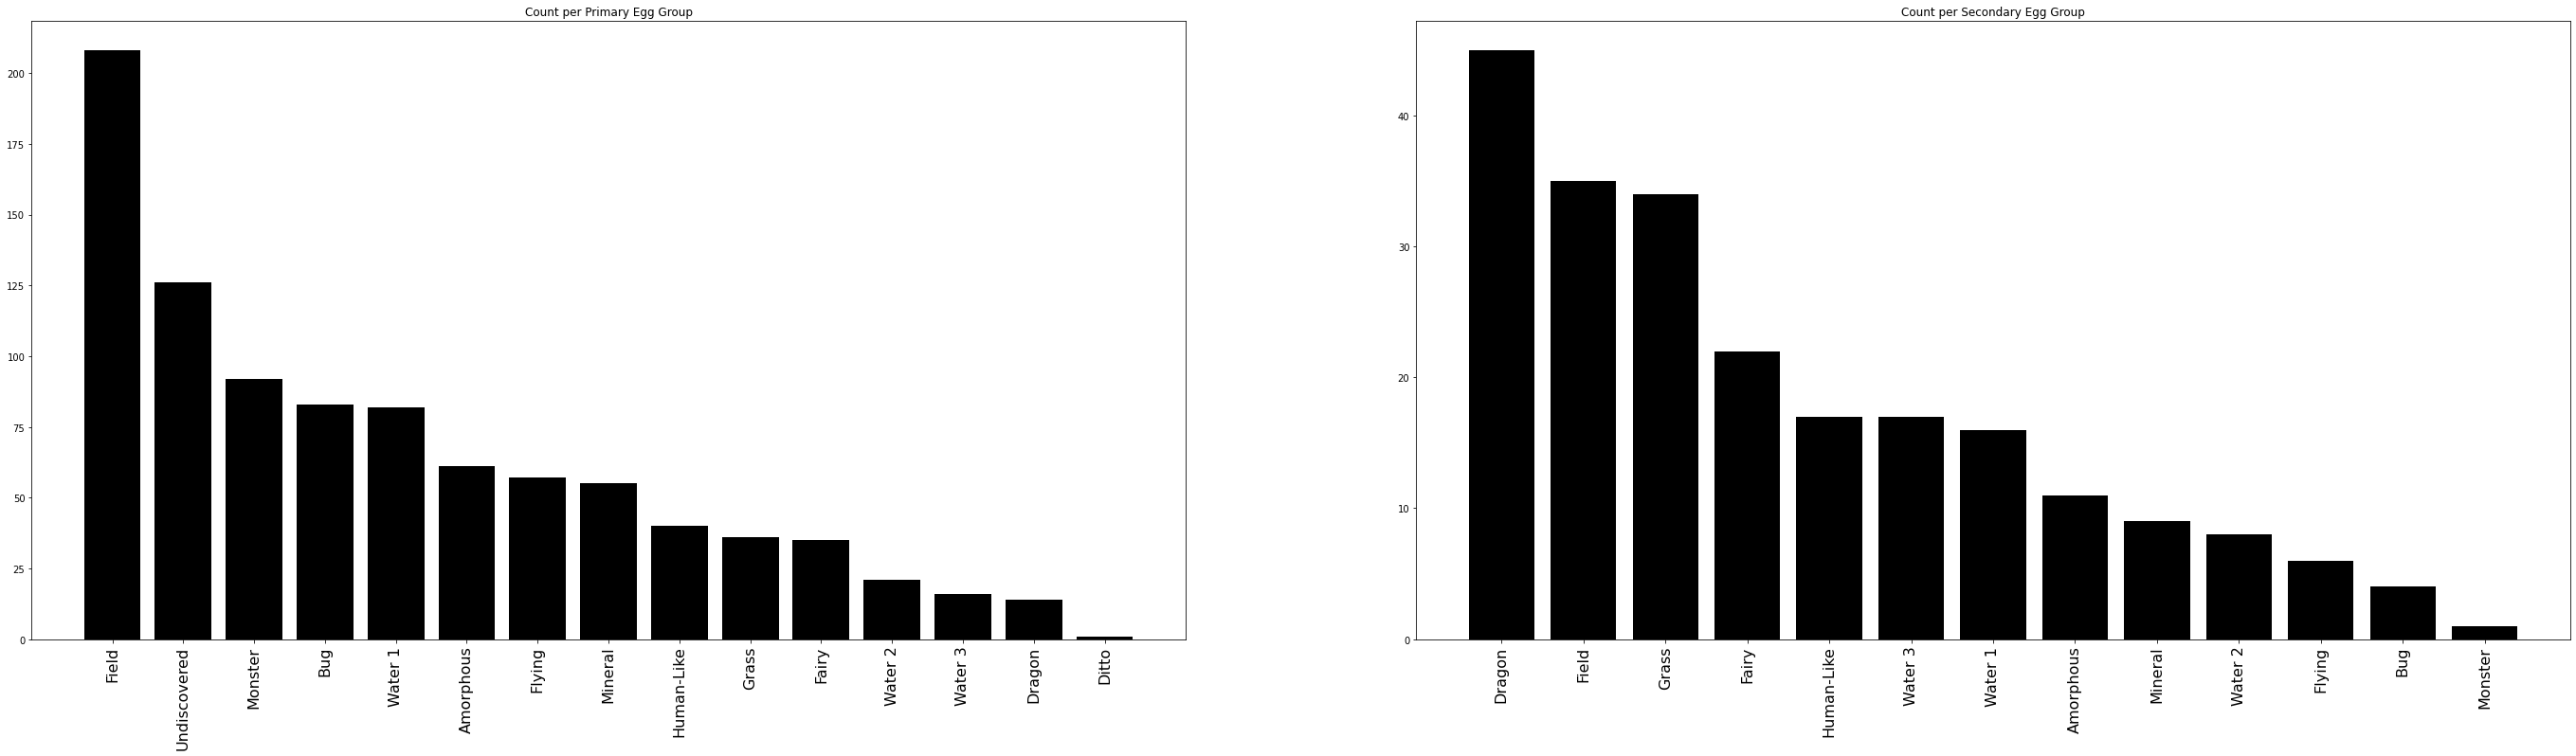

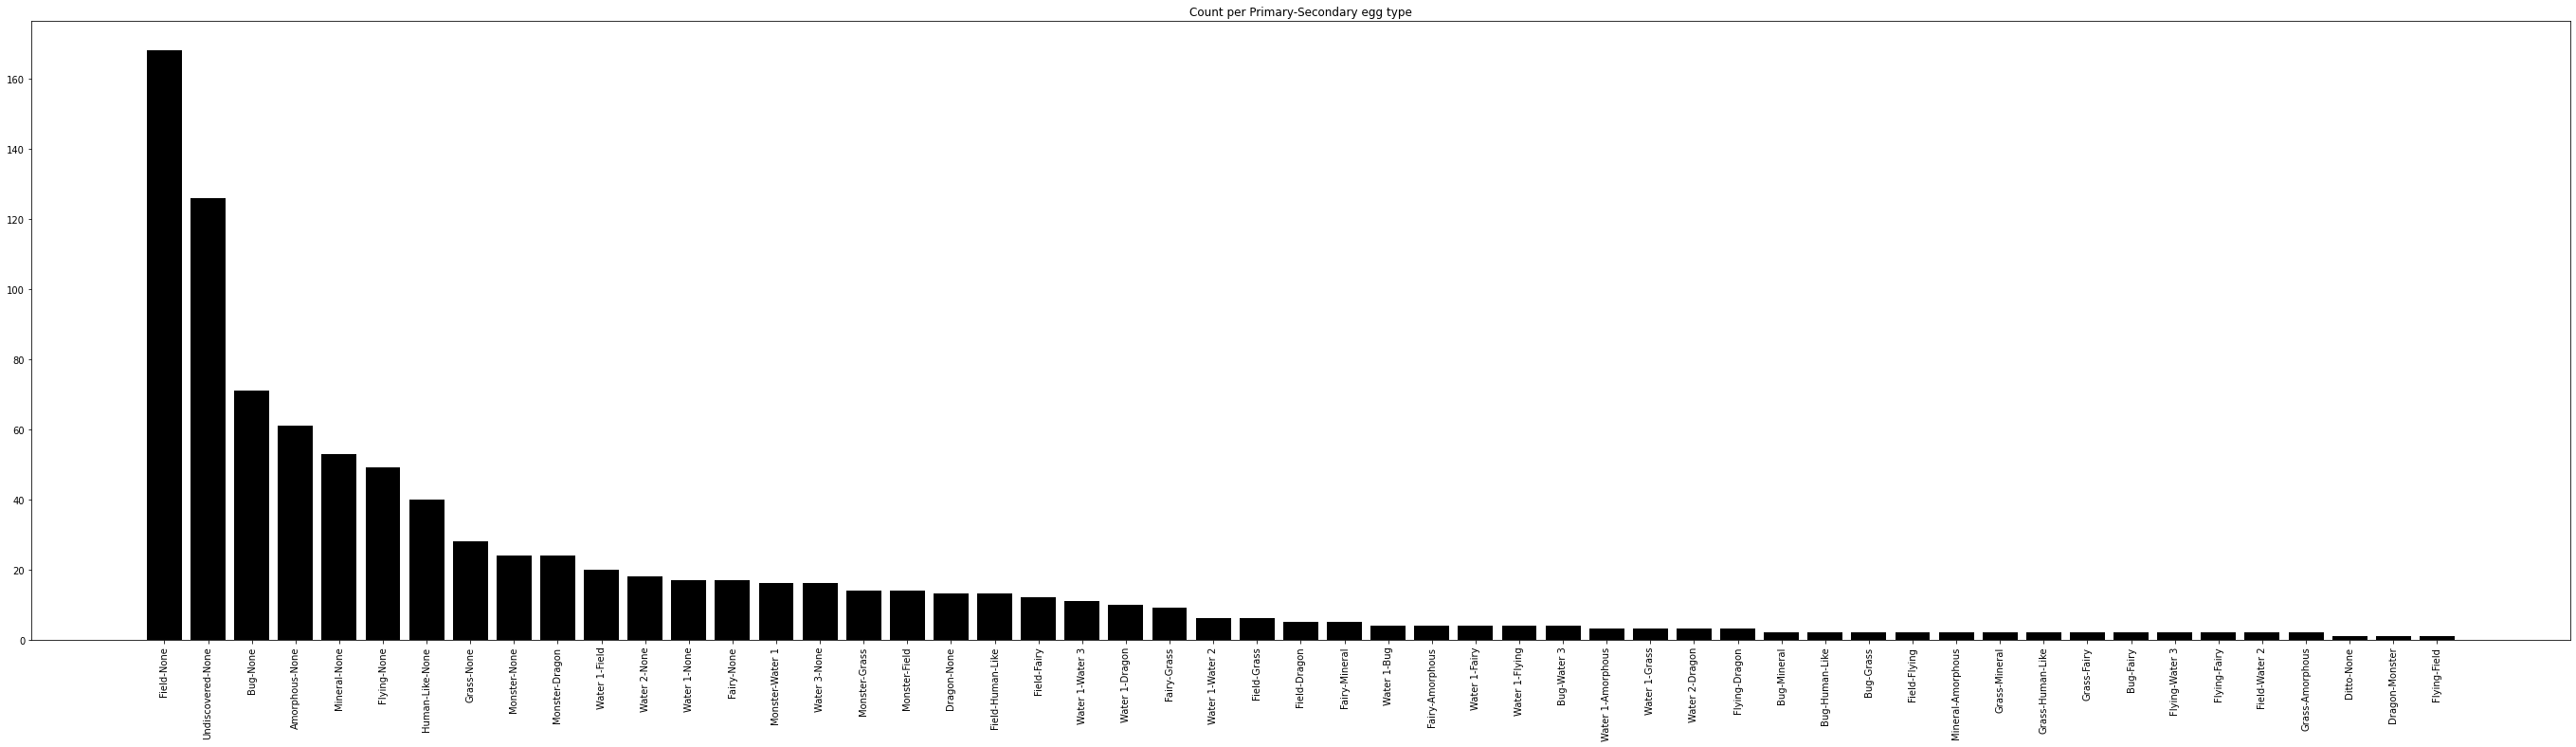

In [5]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(48,12))

# Bar graph for count of pokemon per primary type
x = df.groupby(by='Primary Egg Group',as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Primary Egg Group'] #The bars to graph
y = df.groupby(by='Primary Egg Group',as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Pokedex Number'] #How tall each bar needs to be
ax0.set_title('Count per Primary Egg Group')
plt.sca(ax0)
plt.xticks(rotation=90,fontsize=16)
ax0.bar(x,y,color='black')

x = df.groupby(by='Secondary Egg Group',as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Secondary Egg Group'] #The bars to graph
y = df.groupby(by='Secondary Egg Group',as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Pokedex Number'] #How tall each bar needs to be
ax1.set_title('Count per Secondary Egg Group')
plt.sca(ax1)
plt.xticks(rotation=90,fontsize=16)
ax1.bar(x,y,color='black')
plt.show()

fig = plt.figure(figsize=(48,12))
# Bar graph for count of pokemon per secondary type
x = df.fillna(value='None').groupby(by=['Primary Egg Group','Secondary Egg Group'],as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Primary Egg Group'] + '-' + df.fillna(value='None').groupby(by=['Primary Egg Group','Secondary Egg Group'],as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Secondary Egg Group']
y = df.fillna(value='None').groupby(by=['Primary Egg Group','Secondary Egg Group'],as_index=False).count().sort_values(by='Pokedex Number',ascending=False)['Pokedex Number']
plt.title('Count per Primary-Secondary egg type')
plt.xticks(rotation=90)
plt.bar(x,y,color='black')
plt.show()
plt.close('all')

# Time for correlation matrix

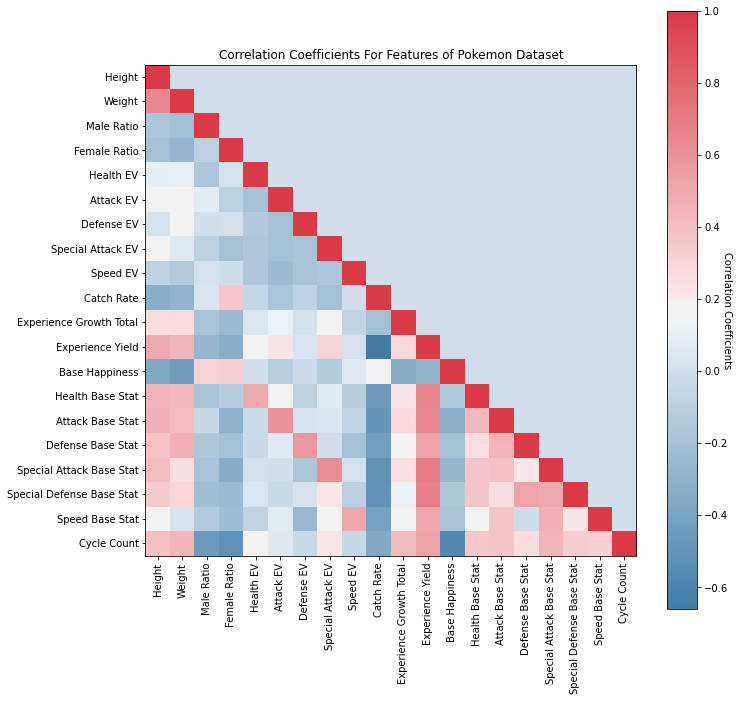

In [6]:
labels=['Height', 'Weight', 'Male Ratio', 'Female Ratio', 'Health EV', 'Attack EV', 'Defense EV', 'Special Attack EV', 'Speed EV', 'Catch Rate', 'Experience Growth Total', 'Experience Yield', 'Base Happiness', 'Health Base Stat', 'Attack Base Stat', 'Defense Base Stat', 'Special Attack Base Stat',
                  'Special Defense Base Stat', 'Speed Base Stat', 'Cycle Count']

ccfs = np.corrcoef([df['{x}'.format(x=x)] for x in labels])

# Make the ccfs a triangluar matrix with only the bottom
tri = np.tril(ccfs)

plt.figure(figsize=(11,11))
# Make a list of labels
labels=['Height', 'Weight', 'Male Ratio', 'Female Ratio', 'Health EV', 'Attack EV', 'Defense EV', 'Special Attack EV', 'Speed EV', 'Catch Rate', 'Experience Growth Total', 'Experience Yield', 'Base Happiness', 'Health Base Stat', 'Attack Base Stat', 'Defense Base Stat', 'Special Attack Base Stat',
                  'Special Defense Base Stat', 'Speed Base Stat', 'Cycle Count']
plt.xticks(ticks=[x for x in range(20)],labels=labels,rotation=90)
plt.yticks(ticks=[x for x in range(20)],labels=labels)
cmap = sns.diverging_palette(240,10,as_cmap=True,center='light') # Colormap of diverging colors
im = plt.imshow(tri,cmap=cmap) #Imshow of the ccfs
cbar = plt.colorbar(im)
cbar.set_label("Correlation Coefficients",rotation=270)
plt.title('Correlation Coefficients For Features of Pokemon Dataset')
plt.show()

## From this we can see the strongest positive correlation pair: Height and Weight
## And the strongest negative correlation pair: Experience Yield and Catch Rate

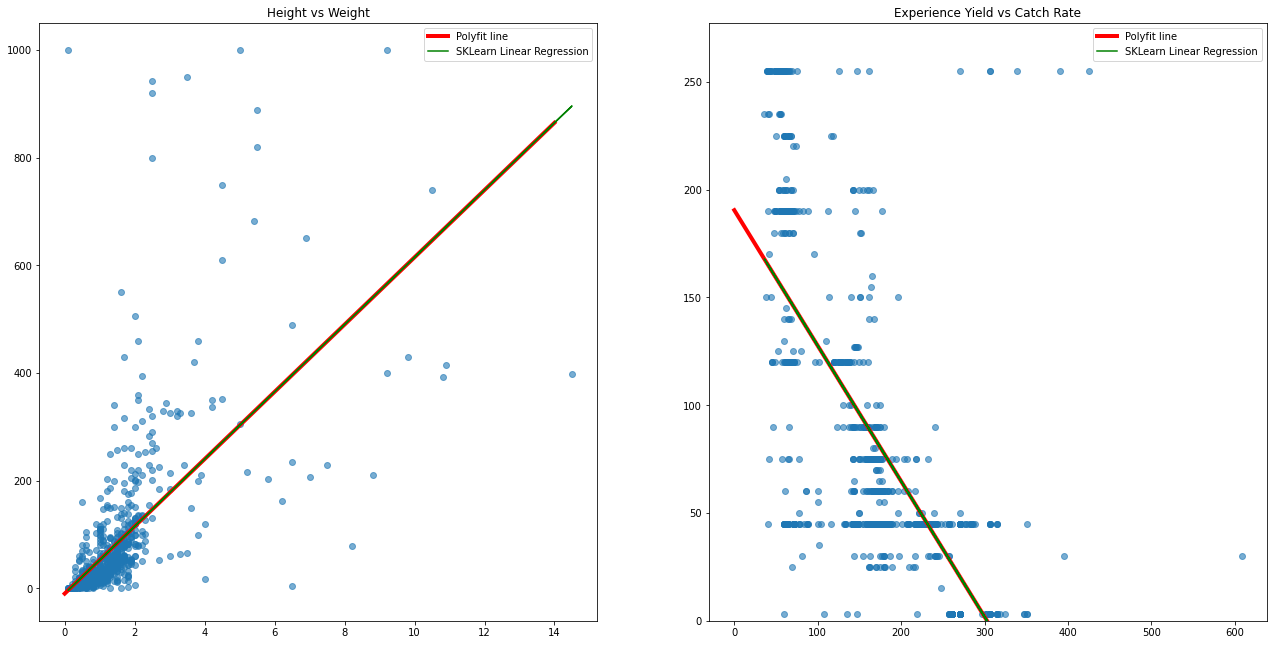

In [7]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(22,11))

m1,b1 = np.polyfit(df['Height'], df['Weight'],1) # Polyfit with numpy
# Linear Regression with SKlearn
regr = linear_model.LinearRegression()
x = df['Height'].values[:,np.newaxis]
y = df['Weight']
regr.fit(x, y)
# Plot the lines and the scatter
ax0.plot(np.arange(0,15), m1 * np.arange(0,15) + b1,label='Polyfit line',c='red',lw=4)
ax0.plot(df['Height'], regr.predict(x),c='green',label='SKLearn Linear Regression')
ax0.scatter(df['Height'], df['Weight'],cmap=cmap,alpha=.6)
ax0.set_title('Height vs Weight')
ax0.legend()


m1,b1 = np.polyfit(df['Experience Yield'], df['Catch Rate'],1) # Polyfit with numpy
# Linear Regression with SKlearn
regr = linear_model.LinearRegression()
x = df['Experience Yield'].values[:,np.newaxis]
y = df['Catch Rate']
regr.fit(x, y)
# Plot the lines and the scatter
ax1.plot(np.arange(0,600), m1 * np.arange(0,600) + b1,label='Polyfit line',c='red',lw=4)
ax1.plot(df['Experience Yield'], regr.predict(x),c='green',label='SKLearn Linear Regression')
ax1.scatter(df['Experience Yield'], df['Catch Rate'],cmap=cmap,alpha=.6)
ax1.set_ylim(bottom=0)
ax1.set_title('Experience Yield vs Catch Rate')
ax1.legend()
plt.show()

## From these graphs, there does seem to be a trend. However, the trend doesn't look as linear as the correlation made it seem.
#### What really interested me is that the polyfit line and the linear regression line lined up really well

## With Height and Weight, the idea that if you get taller you get heavier makes a lot of sense
## However with Experience Yield and Catch Rate, it seems interesting that there's a negative correlation
### This could be due to the fact that the more experience you gain from defeating this Pokemon, it's harder to catch. This makes some sense

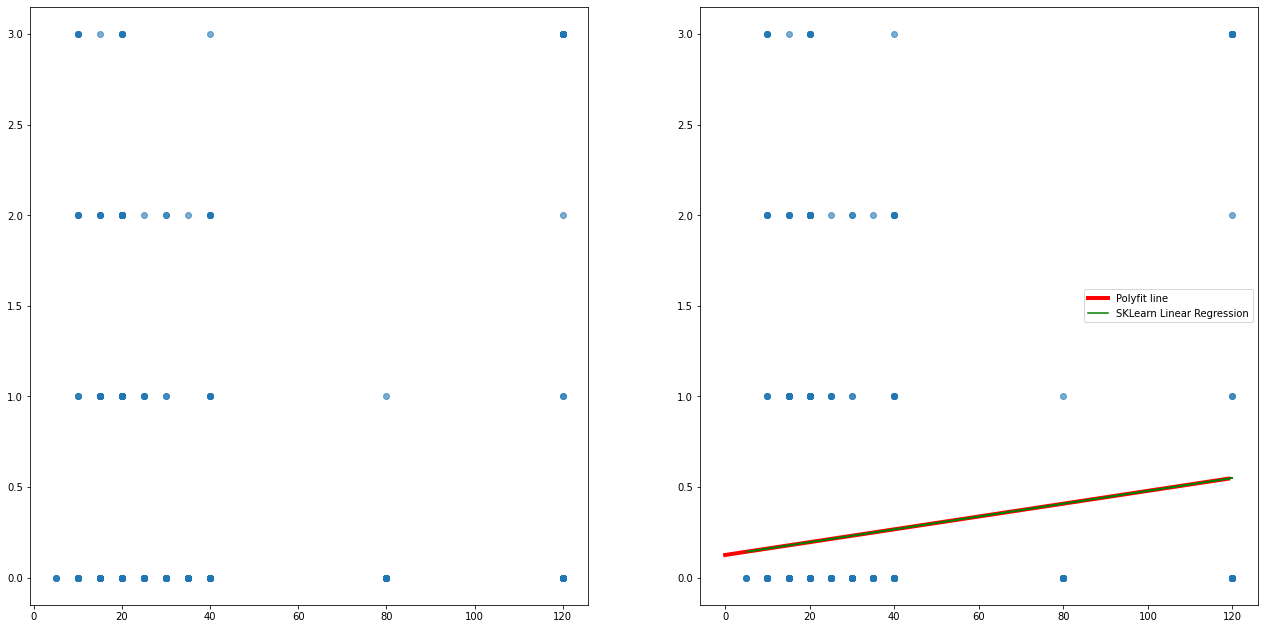

In [8]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(22,11))

ax0.scatter(df['Cycle Count'],df['Health EV'],cmap=cmap,alpha=.6)

m1,b1 = np.polyfit(df['Cycle Count'],df['Health EV'],1) # Polyfit with numpy
# Linear regression with SKLearn
regr = linear_model.LinearRegression()
x = df['Cycle Count'].values[:,np.newaxis]
y = df['Health EV']
regr.fit(x, y)
# Plot the lines and the scatter
ax1.plot(np.arange(0,120), m1 * np.arange(0,120) + b1,label='Polyfit line',c='red',lw=4)
ax1.plot(df['Cycle Count'], regr.predict(x),c='green',label='SKLearn Linear Regression')
ax1.scatter(df['Cycle Count'], df['Health EV'],cmap=cmap,alpha=.6)
ax1.legend()
plt.show()

## There's no way to draw a linear line between these features as they are extremely unrelated (as shown in second plot)
#### Makes no sense to use that line